In [21]:
#these are some typical "imports" they give us some additional functionallity
#over the course of things we will also touch on some python things, like how to make 
# some of the plots nicer and visualise this and that, and so on. 
import numpy as np 
import matplotlib.pyplot as plt 

## Problem 1 : 
Calculate the emergent intensity from a finite, constant slab of optical depth $\tau_\lambda$. Analyze the results for various value of incident intensity $I_\lambda^0$, source function $S$, different optical thicknessses and different wavelengths. 

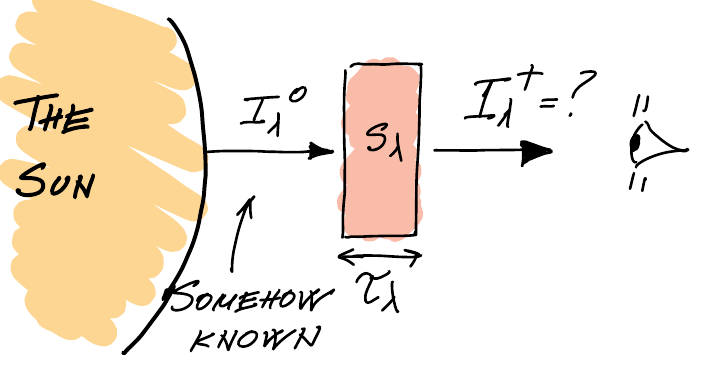

### The solution of the Radiative Transfer Equation for this case is:
$I^+_\lambda = I_\lambda^0 e^{-\tau_\lambda} + S(1-e^{-\tau_\lambda})$ 

In [26]:
# Let's start with a case where we have incident intensity larger than the Source function and 
# a range of values for optical depth

# Don't mind the units for intensity, they are not important here
I_0 = 2.0
S = 1.0

# I am on purpose not calling it tau_lambda because the different optical depths now could, in principle
# emerge from a variety of reasons, different densities, temperatures, sizes of the slab etc. Furthermore
# I want us to imagine we are still looking at only one wavelength

tau = 10.**(np.linspace(-2,2,21))

In [27]:
# Let's solve RTE, it is just this equation here. Note that python will automatically treat tau
# as an array and this I_p will be an array:

I_p = I_0 * np.exp(-tau) + S *(1-np.exp(-tau))

Text(0.5, 0, 'Optical depth of the slab')

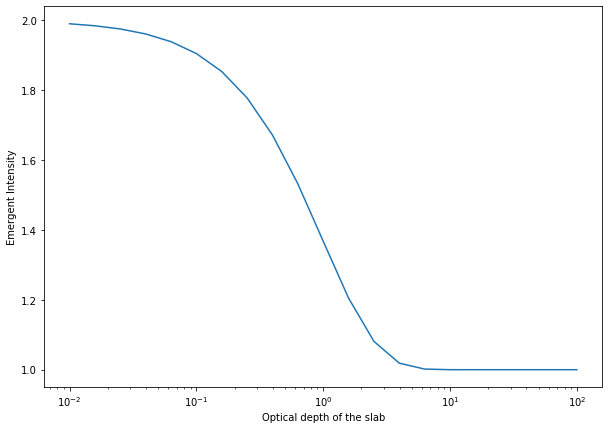

In [28]:
# Let's plot!
plt.figure(figsize=[10,7])
plt.semilogx(tau,I_p)
plt.ylabel("Emergent Intensity")
plt.xlabel("Optical depth of the slab")

#### Interesting! Can you comment on this in the context of what we talked about in class? The shape of the equation alone should provide some hints. 

### Let's try wavelength dependent case! 

We are going to consider a series of wavelengths corresponding to a spectral line where the optical depth at each wavelength is going to be different. Why? Because the lines absorb and emit differently at different wavelengths. The absorption/emission is strongest in the line center and slowly falls off toward the wings. 

We are goin to use a Gaussian to model this behavior

In [52]:
# This is the (wavelength-independent) incoming intensity and (wavelength independent) source function

I_0 = 2.0
S = 1.0

In [53]:
delta_lambda = 0.01 # characteristic width of the gaussian, in nm

llambda = np.linspace(-0.05,0.05,101) # these are the chosen values for the wavelength of the light

# And this is the gaussian that I am using to describe the line absorption, I am going to use
# a very simple gaussian:
phi_lambda = 1./np.sqrt(np.pi)/delta_lambda * np.exp(-llambda**2.0/delta_lambda**2.0)

Text(0, 0.5, 'Line profile')

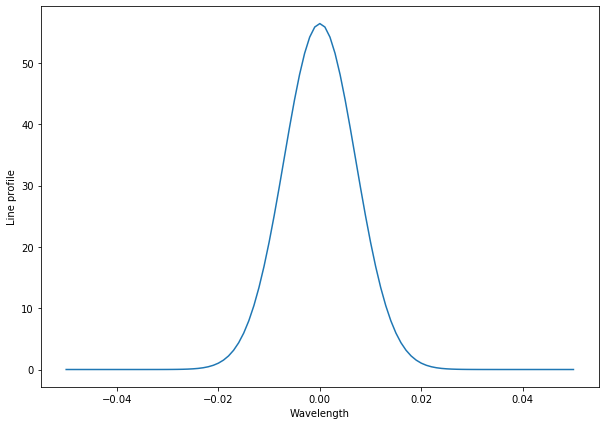

In [54]:
plt.figure(figsize=[10,7])
plt.plot(llambda,phi_lambda)
plt.xlabel("Wavelength")
plt.ylabel("Line profile")

In [55]:
# Now are going to calculate tau at all the wavelenghts

# Let's choose a number that scales the profile so that we get the optical depth

tau_scaling = 0.1


# And then scale the tau at other wavelengths according to the line profile
tau_lambda = tau_scaling * phi_lambda


In [56]:
# Calculate outgoing intensity. Note: This will, again, calculate the intensity at all the 
# wavelengths:

I_p = I_0 * np.exp(-tau_lambda) + S *(1-np.exp(-tau_lambda))

Text(0, 0.5, 'Outgoing intensity')

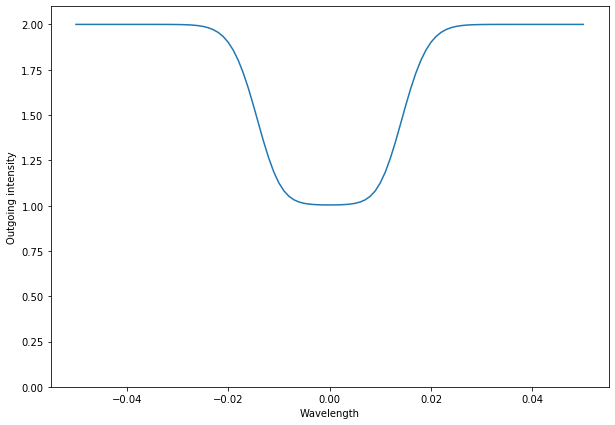

In [57]:
plt.figure(figsize=[10,7])
plt.plot(llambda,I_p)
plt.ylim([0,2.1])
plt.xlabel("Wavelength")
plt.ylabel("Outgoing intensity")

#### Nice! Looks like an absorption line does it not? 
Can you discuss the values at the line core and at the "continuum"? 

Why does the line not reach zero? 

What would happen if we increased the width of the line?

What would happen if we changed the tau_scaling constant?

What would happen if we changed I and S?

(0.0, 2.1)

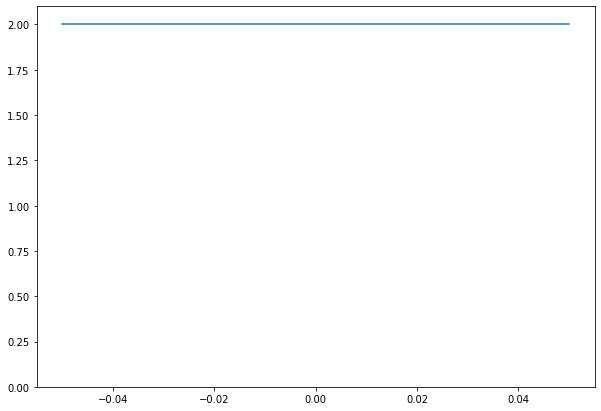

In [60]:
# Let's try to answer this last one. Let's set I and S to an equal value,say, two.

I_0 = 2.0
S = 2.0

I_p = I_0 * np.exp(-tau_lambda) + S *(1-np.exp(-tau_lambda))
plt.figure(figsize=[10,7])
plt.plot(llambda,I_p)
plt.ylim([0.0,2.1])

### Wow! No spectral line? What is this sorcery? 

Think about this and be ready to discuss (might be important for the homework too)